# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import normaltest
import numpy as np
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')

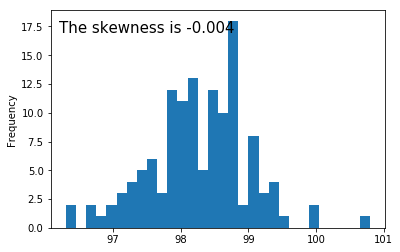

The null hypothesis that the data is normally distributed has a p-value of 0.26.


In [5]:
# Your work here.
df['temperature'].plot.hist(bins=30)
plt.annotate('The skewness is {:.3f}'.format(df.temperature.skew()), xy=(99, 10), xytext=(96.2, 17), fontsize=15)
plt.show()
print('The null hypothesis that the data is normally distributed has a p-value of {:.2f}.'.format(normaltest(df.temperature)[1]))

**1. Answer**: The data is normally distributed as evidenced by both skewness that is close to 0, and the large p-value that does not reject the null hypothesis that the data is
normally distributed.

In [6]:
print('The sample size is {:.0f}.'.format(len(df)))

The sample size is 130.


**2. Answer**: The sample size is pretty small (only 130), but the observations are independent because we cannot infer the gender/temperature/heart rate of one person from the other in the given data.

In [10]:
print('\n ################ bootstrap method ################ \n ')

print('The sample mean (and the null hypothesis) is {:.2f} °F.'.format(df.temperature.mean()))

def draw_bs_reps(data, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = np.average(np.random.choice(data, size=data.size, replace=True))

    return bs_replicates

# Make an array of translated temperature
temp = np.array(df.temperature.values.tolist()) - df.temperature.mean() + 98.6

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(temp, 10000)
print('The bootstrap mean is {:.2f}.'.format(np.average(bs_replicates)))

# Compute fraction of replicates that are less than the observed sample means: p
p = 1 - np.sum(bs_replicates <= df.temperature.mean()) / 100000 # make it survival function

#Print the p-value
print('p-value = {:.4f}. \n'.format(p))


print('\n ################ frequentist statistical testing ################ \n ')

pop_std = np.std(temp)/np.sqrt(len(temp))
print('The standard deviation of the sample is {:.2f}, whereas the population is approximately {:.2f}.'.format(np.std(temp), pop_std))
z_score = (df.temperature.mean() - 98.6)/pop_std
p_val = 1 - st.norm.cdf(z_score) # make it survival function
print('The z-score is {:.4f} and the p-value is {:.4f}.'.format(z_score, p_val))

t_score = (df.temperature.mean() - 98.6)/df.temperature.std()
pval = st.t.sf(np.abs(t_score), 130-1) #survival function already
print('The t-score is {:.4f} and the p-value is {:.4f}.'.format(t_score, pval))


 ################ bootstrap method ################ 
 
The sample mean (and the null hypothesis) is 98.25 °F.
The bootstrap mean is 98.60.
p-value = 1.0000. 


 ################ frequentist statistical testing ################ 
 
The standard deviation of the sample is 0.73, whereas the population is approximately 0.06.
The z-score is -5.4759 and the p-value is 1.0000.
The t-score is -0.4784 and the p-value is 0.3166.


**3. Answer**:

* The bootstrap hypothesis does indicate that the mean of the population is 98.60 °F, with p-value indicating that we rejects the null hypothesis that the mean is 98.25.
* For frequentist statistical testing we would use one sample-test with z-statistics. One sample test is used because we are compaing just 1 dataset with a number (98.6). Z-statistics is used because we can approximate the variance of the population and also the sample indicated that it would be normally distributed. The results showed similarly very high p-value.
* Using t-stats instead significantly changed the results (although not the conclusion). This makes p-value drops to 0.3166. This is because t-score uses sample standard deviation and the distribution is not assumed to be normal like z-score, but is Student's t-distribution.

In [12]:
index = list(np.random.randint(0, len(df), 10))
small_sample =[df.temperature.values.tolist()[i] for i in index]

print('\n ################ small scale frequentist statistical testing ################ \n ')

pop_std = np.std(temp)/np.sqrt(len(small_sample))
print('The standard deviation of the sample is {:.2f}, whereas the population is approximately {:.2f}.'.format(np.std(small_sample), pop_std))
z_score = (np.mean(small_sample) - 98.6)/pop_std
p_val = 1 - st.norm.cdf(z_score) # make it survival function
print('The z-score is {:.4f} and the p-value is {:.4f}.'.format(z_score, p_val))

t_score = (np.mean(small_sample) - 98.6)/np.std(small_sample)
pval = st.t.sf(np.abs(t_score), 10-1) #survival function already
print('The t-score is {:.4f} and the p-value is {:.4f}.'.format(t_score, pval))


 ################ small scale frequentist statistical testing ################ 
 
The standard deviation of the sample is 0.51, whereas the population is approximately 0.23.
The z-score is -0.6928 and the p-value is 0.7558.
The t-score is -0.3148 and the p-value is 0.3801.


**4. Answer**:

* t-score is the correct one to use.
* We can notice that z-score can vary vary heavily (from 0.1 to 0.99) because the number of sample is very low.

In [16]:
np.random.seed(42)

z95 = 1.96
upper_true = 98.6 + z95*df.temperature.std()/np.sqrt(len(df))
lower_true = 98.6 - z95*df.temperature.std()/np.sqrt(len(df))
m_err = z95 * df.temperature.std()/np.sqrt(len(df))*100

# Make an array of translated temperature
temp = np.array(df.temperature.values.tolist()) - df.temperature.mean() + 98.6

# bootstrap method 
bs_replicates = draw_bs_reps(temp, 10000)
#print('The bootstrap mean is {:.2f}.'.format(np.average(bs_replicates)))
#print('The bootstrap std is {:.2f}.'.format(np.std(bs_replicates)))
upper_bs = np.average(bs_replicates) + z95*df.temperature.std()/np.sqrt(len(df))
lower_bs = np.average(bs_replicates) - z95*df.temperature.std()/np.sqrt(len(df))
margin_bs = z95 * np.std(bs_replicates)/np.sqrt(10000)

# frequentist statistical testing
pop_std = np.std(temp)/np.sqrt(len(temp))
#print('The standard deviation of the sample is {:.2f}, whereas the population is approximately {:.2f}.'.format(np.std(temp), pop_std))
upper_zs = z95*pop_std + 98.6
lower_zs = -z95*pop_std + 98.6

print('The temperature corresponding for upper and lower CI from a given populatio mean is ({:.4f} and {:.4f}) with a margin error of {:.2f}%.'.format(upper_true, lower_true, m_err))
print('The temperature corresponding for upper and lower CI from a bootstrap method is ({:.4f} and {:.4f}).'.format(upper_bs, lower_bs))
print('The temperature corresponding for upper and lower CI from a frequentist statistics method is ({:.4f} and {:.4f}).'.format(upper_zs, lower_zs))

The temperature corresponding for upper and lower CI from a given populatio mean is (98.7260 and 98.4740) with a margin error of 12.60%.
The temperature corresponding for upper and lower CI from a bootstrap method is (98.7266 and 98.4746).
The temperature corresponding for upper and lower CI from a frequentist statistics method is (98.7256 and 98.4744).


**5. Answer**: Using 95% confident interval for considertaion of "normal" temperature, all methods indicate that abnormal temperatures are ones that either below 98.474 °F or ones that beyond 98.726 °F.

In [17]:
male_temp = df.temperature[df['gender']=='M'].values.tolist()
female_temp = df.temperature[df['gender']=='F'].values.tolist()
_, p = st.f_oneway(male_temp, female_temp)
print('The p-value is {:.4f}'.format(p))

The p-value is 0.0239


In [18]:
np.average(female_temp) - np.average(male_temp) 

0.2892307692307696

**6. Answer**: As p-value from ANOVA test is lower than 0.05, we could say that the mean values of temperature in males and females are statistically different. This is an interesting finding, we can see that male's temperature is about 0.29 °F lower than female's. Upon further research, we found that this is due to several reasons including,

* Women have higher core body temperatures than men.
* Women on birth control have even higher core body temperatures.
* Women have slower metabolic rates than men.

Ref: <html>http://www.foxnews.com/health/2017/01/15/theres-scientific-reason-women-are-always-colder-than-men.html